In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import display


%matplotlib inline

seed = 0

## Functions for all methods used found in cell below
* Normal Equation - Analytical solution
* Gradient Descent - Numerical solution where the whole dataset is used to update theta once
* Stochastic Gradient Descent - Numerical solution where each example is used to update theta, therefore one pass through a set with n examples produces n updates to theta. The number of epochs represents the number of times the dataset is analyzed. The data is shuffled each epoch.

In [2]:
def normal_equation(X, y):
    inv = np.linalg.inv(np.dot(X.T,X))
    numer = np.dot(X.T, y)
    theta = np.dot(inv, numer)
    return theta.T

def calc_cost(X, y, theta):
    cost = np.sum(np.power(np.matmul(X,theta.T)-y,2))/(2*len(X))
    #print y
    return cost

def plot_cost(cost, iters):
    plt.plot(np.arange(iters), cost)
    plt.xlabel('Iterations')
    plt.ylabel('Error')

def gradient_descent(X, y, theta, iters, alpha, plot = True):
    cost = []
    
    for i in range(iters):
        theta = theta - alpha/len(X)*np.sum(X*(np.matmul(X, theta.T)-y),axis=0)
        cost.append(calc_cost(X,y,theta))
        #print theta
    
    if plot:
        plot_cost(cost,iters)
        
    return theta, cost

def sgd(X, y, theta, epochs, alpha, num_examples = False, plot=True):
    from sklearn.utils import shuffle
    cost = []
    if num_examples == False or num_examples >= len(X):
        num_examples = len(X)
    
    for i in range(epochs):
        X,y = shuffle(X,y)
        
        #print X.shape
        #test = X[1].reshape(1,-1)
        #print test.shape
        
        for j in range(num_examples):
            theta = theta - alpha*X[j]*(np.matmul(X[j], theta.T)-y[j])
            cost.append(calc_cost(X[j].reshape(1,-1),y[j],theta))
            #print X[j].shape
            
    
    if plot:
        plot_cost(cost,num_examples*epochs)
         
    return theta, cost
    


## Attempt to reproduce results

Check above `gradient_descent` function by reproducing results using the data found in [this tutorial](https://medium.com/we-are-orb/multivariate-linear-regression-in-python-without-scikit-learn-7091b1d45905). The preprocessing steps found in the tutorial are implemented in order to make a valid comparison.

[[ -1.03191687e-16   8.78503652e-01  -4.69166570e-02]]
0.130703369608


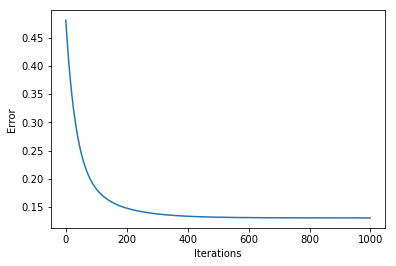

In [3]:
data = pd.read_csv('house.txt',names=["size","bedroom","price"])
#Mean normalization
data = (data - data.mean())/data.std()
X_small = data.iloc[:,0:2].values
ones = np.ones([X_small.shape[0],1])
X_small = np.concatenate((ones,X_small),axis=1)
y_small = data.iloc[:,2:3].values
theta_small = np.zeros([1,X_small.shape[1]])

t_small,c_small = gradient_descent(X_small, y_small, theta_small, 1000, 0.01)
print t_small
print c_small[-1]

The coefficients and final cost determined by `gradient_descent` match those found in the tutorial. The function therefore appears to be functioning properly.

## Compare to the normal equation and LinearRegression.

In [4]:
norm_small = normal_equation(X_small,y_small)
linreg_small = LinearRegression(fit_intercept = False)
linreg_small.fit(X_small,y_small)
print('Coefficients from gradient_descent {}'.format(t_small))
print('Coefficients from normal equation {}'.format(norm_small))
print('Coefficients from LinearRegression {}'.format(linreg_small.coef_))

Coefficients from gradient_descent [[ -1.03191687e-16   8.78503652e-01  -4.69166570e-02]]
Coefficients from normal equation [[ -1.13257800e-16   8.84765988e-01  -5.31788197e-02]]
Coefficients from LinearRegression [[ -1.01852438e-16   8.84765988e-01  -5.31788197e-02]]


In [5]:
'''
Using the results from LinearRegression as the 'correct' values, the percent error of the gradient_descent algorithm for each
coefficient is
'''
def percent_error(experimental, theoretical):
    return 100*np.absolute((experimental-theoretical)/theoretical)

print percent_error(t_small, linreg_small.coef_)

[[  1.31489138   0.7077957   11.77567059]]


Not terrible, but not great either.

## Apply Gradient Descent to more complex data set and compare results to Linear Regression and the Normal Equation

In [6]:
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
display(data.describe())

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
#Needed to copy and paste to structure X and y
data.keys()

Index([u'Cement (component 1)(kg in a m^3 mixture)',
       u'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       u'Fly Ash (component 3)(kg in a m^3 mixture)',
       u'Water  (component 4)(kg in a m^3 mixture)',
       u'Superplasticizer (component 5)(kg in a m^3 mixture)',
       u'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       u'Fine Aggregate (component 7)(kg in a m^3 mixture)', u'Age (day)',
       u'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
#Fly ash is dropped becuase >50% of the data for this parameter is 0
X = data.drop(['Fly Ash (component 3)(kg in a m^3 mixture)','Concrete compressive strength(MPa, megapascals) '], axis=1)
y = data[['Concrete compressive strength(MPa, megapascals) ']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [10]:
from sklearn.preprocessing import Normalizer

X = X_train.values
y = y_train.values

norm = Normalizer()
norm.fit(X_train)

X = norm.transform(X_train)
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

theta = np.zeros([1,X.shape[1]])

In [11]:
norm_eq =  normal_equation(X,y)
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

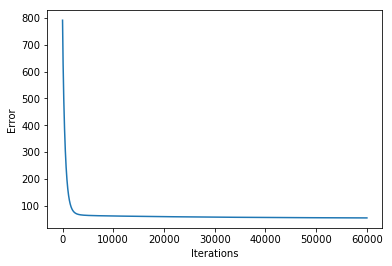

In [12]:
t_gd,c_gd = gradient_descent(X, y, theta, 60000, 1.009)

## Coefficients produced by Gradient Descent, the Normal Equation, and Linear Regression

In [13]:
print('Gradient descent error: {:.2f}\n'.format(c_gd[-1]))
print('Coefficients from gradient_descent:\n {}\n'.format(t_gd))
print('Coefficients from normal equation:\n {}\n'.format(norm_eq))
print('Coefficients from LinearRegression:\n {}'.format(linreg.coef_))

Gradient descent error: 54.83

Coefficients from gradient_descent:
 [[-376.4750986   209.35074001  123.24560723 -204.20584487  552.85741351
   315.41422884  242.06338027  189.46943179]]

Coefficients from normal equation:
 [[-589.9993156   257.20403804  136.78923478 -132.23577857  926.82731084
   475.13930435  360.39679933  216.39809063]]

Coefficients from LinearRegression:
 [[-589.99931561  257.20403804  136.78923478 -132.23577856  926.82731084
   475.13930435  360.39679933  216.39809063]]


In [14]:
prcnt_err_gd = percent_error(t_gd, linreg.coef_)
print prcnt_err_gd

[[ 36.19058724  18.60518925   9.90109169  54.4255625   40.34946888
   33.6164729   32.83420366  12.44403717]]


## Apply stochastic gradient descent
The above performance of gradient descent is suboptimal considering the dataset is passed through 60000 times. Let's see if improvements can be made by using stochastic gradient descent.

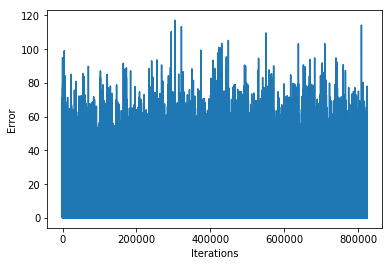

In [15]:
t_sgd,c_sgd = sgd(X,y,theta,1000,0.6)
prcnt_err_sgd = percent_error(t_sgd, linreg.coef_)

In [16]:
print('SGD coefficients: \n{}\n'.format(t_sgd))
print('SGD percent error: \n{}\n'.format(prcnt_err_sgd))
print('GD percent error: \n{}'.format(prcnt_err_gd))

SGD coefficients: 
[[-597.62101653  254.95774021  140.35984677 -125.34043     916.97359618
   463.96277505  370.1394441   214.03588418]]

SGD percent error: 
[[ 1.29181521  0.87335248  2.6103019   5.21443488  1.0631662   2.35226368
   2.70331057  1.09160226]]

GD percent error: 
[[ 36.19058724  18.60518925   9.90109169  54.4255625   40.34946888
   33.6164729   32.83420366  12.44403717]]


Much better results with only 1000 passes through the dataset.

## Experiment with SGD and GD
* See how many GD iterations are necessary to produce similar results to SGD, if possible
* See how close SGD can get to the actual solution


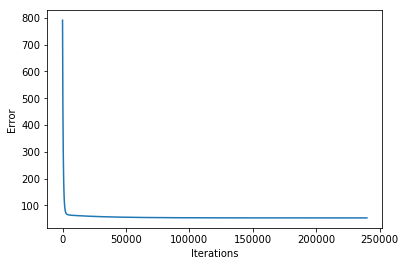

In [20]:
t_gd,c_gd = gradient_descent(X, y, theta, 240000, 1.009)

Law of diminishing returns is very obvious here

In [21]:
print('SGD coefficients: \n{}\n'.format(t_sgd))
print('GD coefficients: \n{}\n'.format(t_gd))
print('SGD percent error: \n{}\n'.format(prcnt_err_sgd))
print('GD percent error: \n{}'.format(percent_error(t_gd, linreg.coef_)))

SGD coefficients: 
[[-597.62101653  254.95774021  140.35984677 -125.34043     916.97359618
   463.96277505  370.1394441   214.03588418]]

GD coefficients: 
[[-581.46907049  255.48980441  136.47527945 -136.46450829  898.5044595
   468.77791439  355.98266246  215.26349949]]

SGD percent error: 
[[ 1.29181521  0.87335248  2.6103019   5.21443488  1.0631662   2.35226368
   2.70331057  1.09160226]]

GD percent error: 
[[ 1.44580593  0.66648784  0.22951757  3.19787109  3.05589305  1.33884734
   1.22479913  0.52430737]]


It takes ~240k iterations of gradient descent to produce coefficients similar to those produced by SGD